In [16]:
%matplotlib inline
import numpy as np
# from scipy import misc
import matplotlib.pyplot as plt
import scipy


## Creating a numpy array from an image file

Lets choose WIFIRE satellite image file as ndarray and display its type

In [17]:
print(scipy.__version__)

1.1.0


In [23]:
photo_location="/media/atif/Data/DataScience/EDX/UCSandiago_Specialisation/python_for_data_science/week3/wifire/sd-3layers.jpg"

## scipy.misc.imread is depricated so you have to use matplotlib.pyplot.imread in place of that
# photo_data=scipy.misc.imread(photo_location) 
photo_data=plt.imread(photo_location)
# photo_data=misc.(photo_location)


type(photo_data)

numpy.ndarray

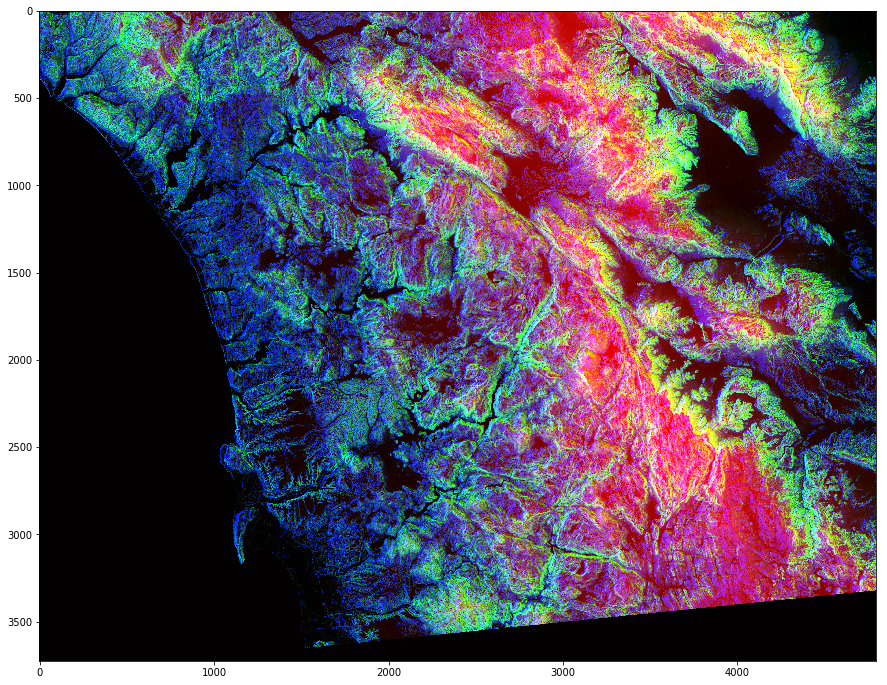

In [25]:
plt.figure(figsize=(15,15)) # gives framesize for image
plt.imshow(phot_data) # shows image

In [26]:
print(photo_data.shape)

(3725, 4797, 3)


The shape of the ndarray show that it is a three layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for three layers: Red, Green and Blue.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
RGB Color Mapping in the Photo:</p> <br>
<ul>
<li><p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold">
RED pixel indicates Altitude</p>
<li><p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold">
BLUE pixel indicates Aspect
</p>
<li><p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold">
GREEN pixel indicates Slope
</p>
</ul>
<br>
The higher values denote higher altitude, aspect and slope.


In [27]:
photo_data.size

53606475

In [28]:
photo_data.min() , photo_data.max()

(0, 255)

In [29]:
photo_data.mean()

75.8299354508947

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Pixel on the 150th Row and 250th Column</p>

In [31]:
photo_data[150,250]

array([ 17,  35, 255], dtype=uint8)

In [32]:
photo_data[150,250,1]

35

In [34]:
photo_data.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [39]:
#here WRITEABLE is false
# we need to set it to true

photo_data.setflags(write=1)
photo_data.flags
#or we can make a copy of the image using 
photo_data_copy=photo_data.copy()

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Set a Pixel to All Zeros</p>
<br/>
We can set all three layer in a pixel as once by assigning zero globally to that (row,column) pairing. However, setting one pixel to zero is not noticeable.

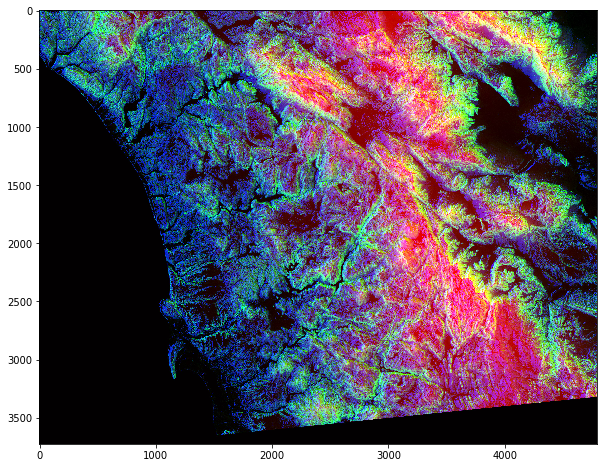

In [40]:
photo_data[150,250]=0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

In [41]:
# changing a range of pixel

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Changing colors in a Range<p/>
<br/>
We can also use a range to change the pixel values. As an example, let's set the green layer for rows 200 t0 800 to full intensity.

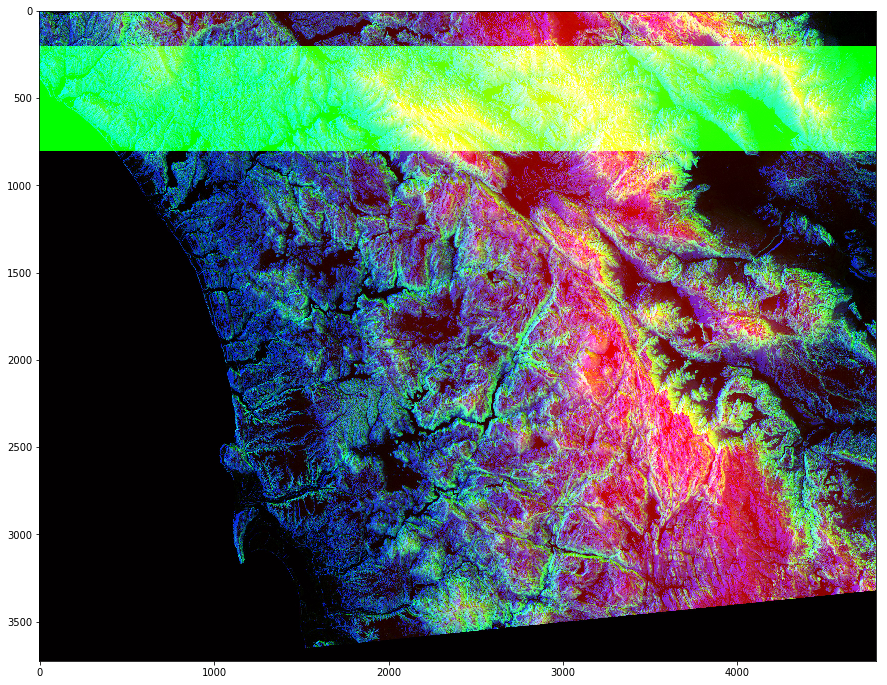

In [43]:
photo_data[200:800,:,1]=255
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

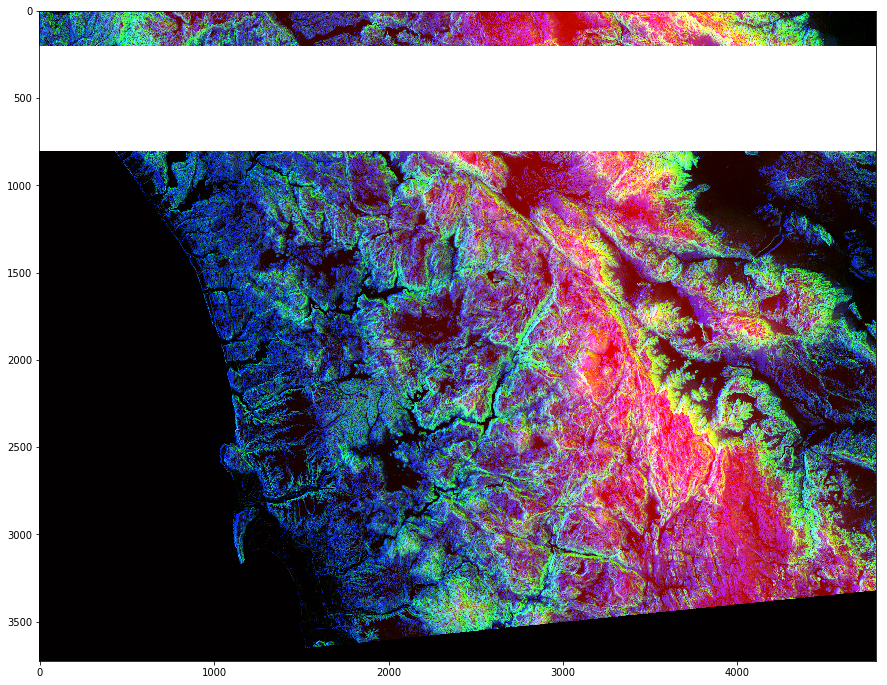

In [44]:
photo_data[200:800,:]=255
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

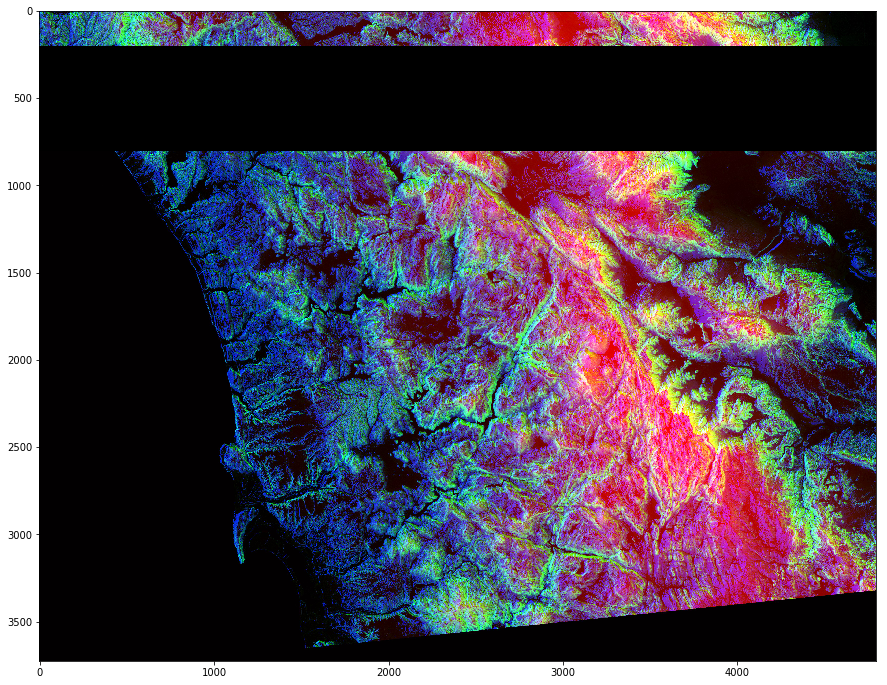

In [45]:
photo_data[200:800,:]=0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Pick all Pixels with Low Values</p>

In [55]:
photo_data=plt.imread('./wifire/sd-3layers.jpg')
low_value_filter=photo_data<200
print(low_value_filter.shape)

(3725, 4797, 3)


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Filtering Out Low Values</p><br/>
Whenever the low_value_filter is True, set value to 0.

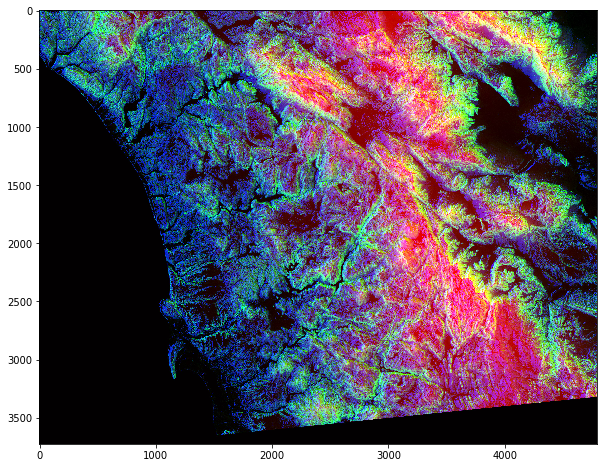

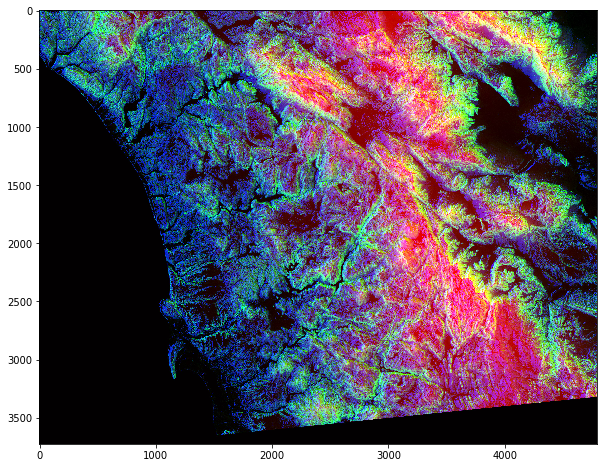

In [56]:
photo_data.setflags(write=1)
import random
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
photo_data[low_value_filter]=0
plt.figure(figsize=(10,10))

plt.imshow(phot_data)



<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
More Row and Column Operations</p><br>
You can design complex patters by making cols a function of rows or vice-versa. Here we try a linear relationship between rows and columns.

In [58]:
row_range=np.arange(len(photo_data))
cols_range=row_range
print(type(row_range))

<class 'numpy.ndarray'>


In [59]:
photo_data[row_range,cols_range]=255

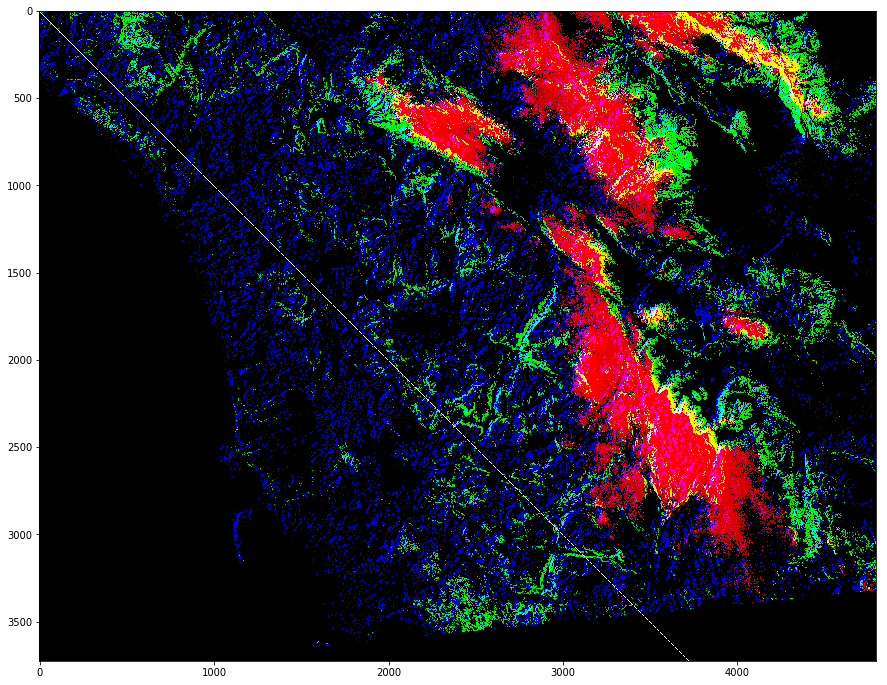

In [60]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Masking Images</p>
<br>Now let us try something even cooler...a mask that is in shape of a circular disc.

In [62]:
total_rows,total_cols,total_layer=photo_data.shape

In [67]:
X,Y=np.ogrid[:total_rows,:total_cols]
print(X.shape,Y.shape)

(3725, 1) (1, 4797)


In [69]:
center_row, center_col = total_rows / 2, total_cols / 2
print("center_row = ", center_row, "AND center_col = ", center_col)#print(X - center_row)
print(Y - center_col)
dist_from_center = (X - center_row)**2 + (Y - center_col)**2
print(dist_from_center)
radius = (total_rows / 2)**2
print("Radius = ", radius)
circular_mask = (dist_from_center > radius)#print(circular_mask)
print(circular_mask[1500:1700,2000:2200])

center_row =  1862.5 AND center_col =  2398.5
[[-2398.5 -2397.5 -2396.5 ...  2395.5  2396.5  2397.5]]
[[9221708.5 9216912.5 9212118.5 ... 9207326.5 9212118.5 9216912.5]
 [9217984.5 9213188.5 9208394.5 ... 9203602.5 9208394.5 9213188.5]
 [9214262.5 9209466.5 9204672.5 ... 9199880.5 9204672.5 9209466.5]
 ...
 [9210542.5 9205746.5 9200952.5 ... 9196160.5 9200952.5 9205746.5]
 [9214262.5 9209466.5 9204672.5 ... 9199880.5 9204672.5 9209466.5]
 [9217984.5 9213188.5 9208394.5 ... 9203602.5 9208394.5 9213188.5]]
Radius =  3468906.25
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
